In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    'Bank': ['BNA','UBCI','Attijari bank','ATB','BH Bank'],
    'Cost-to-Income Ratio': [0.3891,0.642075,6.76945,0.5365,0.502983875],
    'Loan-to-Deposit Ratio': [1.29280,0.87980,0.6185,0.8632,1.25932],
    'Net Interest Margin': [0.0255725,0.039525,0.0261925,0.0178,0.024829225],
    'Return on Assets': [0.00853,0.01185,0.038675,-0.0019,0.00899],
    'Return on Equity': [0.0840025,0.10115,0.161125,-0.0263,0.09675],
    'Capital Adequacy Ratio': [0.102785,0.117,2.91925,0.0733,0.092101]
}

df = pd.DataFrame(data)

# Define weights for each ratio (adjust as needed)
weights = {
    'Cost-to-Income Ratio': -1,  # Lower is better
    'Loan-to-Deposit Ratio': 1,   # Higher is better
    'Net Interest Margin': 1,     # Higher is better
    'Return on Assets': 1,       # Higher is better
    'Return on Equity': 1,        # Higher is better
    'Capital Adequacy Ratio': 1   # Higher is better
}

# Normalize the data (optional, but can be useful for comparing ratios with different scales)
df_normalized = (df.iloc[:, 1:] - df.iloc[:, 1:].min()) / (df.iloc[:, 1:].max() - df.iloc[:, 1:].min())

# Calculate the weighted score for each bank
df['Weighted Score'] = (df_normalized * weights).sum(axis=1)

# Rank the banks based on their weighted scores
df_ranked = df.sort_values(by='Weighted Score', ascending=False)

print(df_ranked)

            Bank  Cost-to-Income Ratio  Loan-to-Deposit Ratio  \
2  Attijari bank              6.769450                0.61850   
1           UBCI              0.642075                0.87980   
0            BNA              0.389100                1.29280   
4        BH Bank              0.502984                1.25932   
3            ATB              0.536500                0.86320   

   Net Interest Margin  Return on Assets  Return on Equity  \
2             0.026193          0.038675          0.161125   
1             0.039525          0.011850          0.101150   
0             0.025573          0.008530          0.084002   
4             0.024829          0.008990          0.096750   
3             0.017800         -0.001900         -0.026300   

   Capital Adequacy Ratio  Weighted Score  
2                2.919250        2.386306  
1                0.117000        2.382103  
0                0.102785        2.213698  
4                0.092101        2.187581  
3               

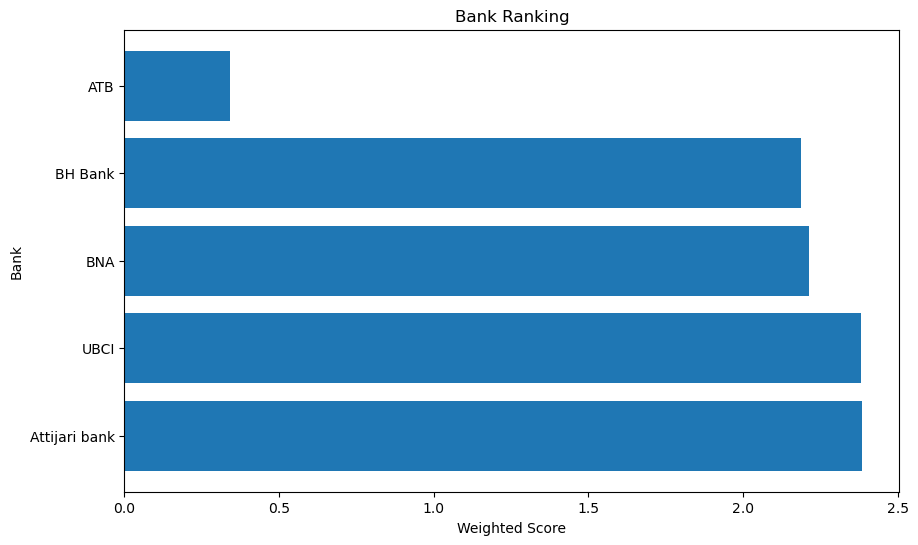

In [21]:

plt.figure(figsize=(10, 6))
plt.barh(df_ranked['Bank'], df_ranked['Weighted Score'])
plt.xlabel('Weighted Score')
plt.ylabel('Bank')
plt.title('Bank Ranking')
plt.show()